In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_excel("houses_for_rent_madrid.xlsx")

## Explanatory Analysis

In [19]:
data.dtypes

Id                int64
District         object
Address          object
Number           object
Area             object
Rent              int64
Bedrooms        float64
Sq.Mt             int64
Floor           float64
Outer           float64
Elevator        float64
Penthouse         int64
Cottage           int64
Duplex            int64
Semidetached      int64
dtype: object

In [20]:
data.describe(include='all')

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2089.000000,2089,2089,747,2085,2089.000000,2000.000000,2089.000000,1948.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,NaN,20,1336,137,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Salamanca,Piso en Recoletos,1,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,313,25,29,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1094.026807,NaN,NaN,NaN,NaN,1932.249402,2.483000,128.919579,25.662731,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,630.612544,NaN,NaN,NaN,NaN,1495.474485,1.305206,115.745014,975.065350,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,1.000000,NaN,NaN,NaN,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,550.000000,NaN,NaN,NaN,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1094.000000,NaN,NaN,NaN,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1636.000000,NaN,NaN,NaN,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
data.shape

(2089, 15)

## Part 1: Remove columns "Id", "District", "Address", "Number"

In [22]:
data1=data.drop(columns=['Id','District','Address','Number'])

## Part 2: Imputate missing "Bedrooms", "Floors" and "Sq.Mt"

In [23]:
data1['Floor'].fillna(data1['Floor'].mean(),inplace=True)
data1['Bedrooms'].fillna(data1['Bedrooms'].mean(),inplace=True)
data1['Sq.Mt'].fillna(data1['Sq.Mt'].mean(),inplace=True)

## Part 3: Remove all rows with a missing value.
(Note: "Bedrooms", "Floor" and "Area" should not have missing value because of the imputation in the last part).

In [24]:
# Replacing alternative representations with NaN
data1.replace(['None', 'NA', 'NaN', ''], pd.NA, inplace=True)
data1.dropna(axis=0, inplace=True)
data1.isna().sum()

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
dtype: int64

## Part 4: Plot a histogram of Bedrooms, Floor and Sq.Mt

(array([ 14., 443., 660., 484.,   0., 226.,  75.,   9.,   2.,   4.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

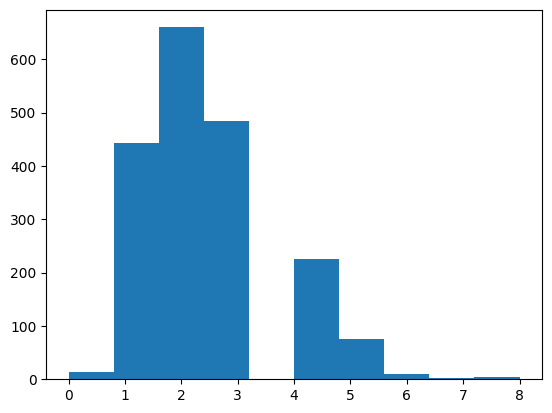

In [25]:
# Your code here
import matplotlib.pyplot as plt
plt.hist(data1['Bedrooms'])

(array([451., 912., 398.,  92.,  26.,  10.,   5.,   1.,  19.,   3.]),
 array([-1.,  2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29.]),
 <BarContainer object of 10 artists>)

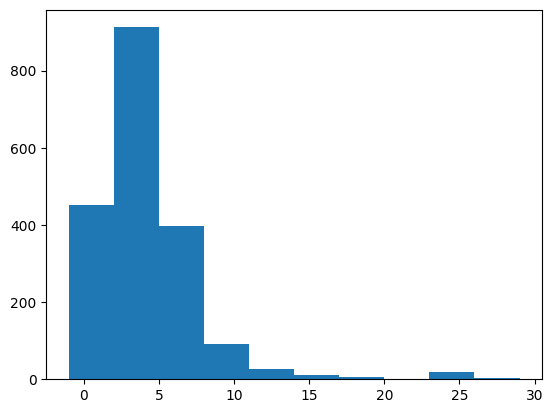

In [26]:
plt.hist(data1['Floor'])

(array([1.477e+03, 3.410e+02, 6.400e+01, 2.900e+01, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  20.,  143.,  266.,  389.,  512.,  635.,  758.,  881., 1004.,
        1127., 1250.]),
 <BarContainer object of 10 artists>)

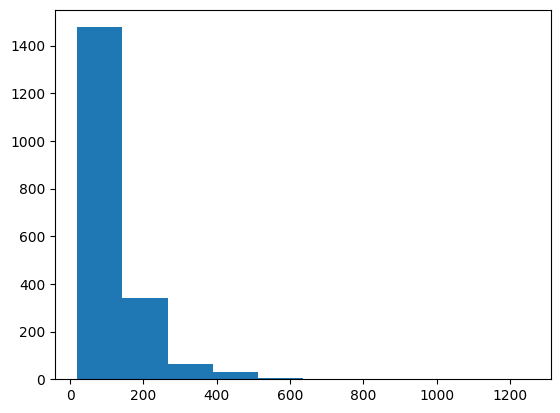

In [27]:
plt.hist(data1['Sq.Mt'])

## Part 5: Remove all rows with Floor>20

In [28]:
data1=data1[data1['Floor']<=20]

In [29]:
data1.shape

(1895, 11)

## Part 6: Split data to train (70%) and val (15%) and test (15%)


In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data1, test_size=0.3)
test, val=train_test_split(test, test_size=0.5)

## Part 7: Impact encode "Area" with respect to target variable ("Rent"), replacing the original column with the encoded column.

Note that the encoding is computed only using the training set, but must be applied to the val and test set as well.  If the val/test set contain rows with "Area" that was not observed in the training, then the encoding cannot be computed for those rows, and they should be removed.

In [31]:
area_means = train.groupby('Area')['Rent'].mean()
for dataset in [train, val, test]:
    dataset['Area_encoded'] = dataset['Area'].map(area_means)

for dataset in [train, val, test]:
    dataset.drop(columns=['Area'], inplace=True)

## Part 8: Running linear regression using numerical features only (including the newly created impact encoding from Part 7).  Train on the training set only, computing and printing the mean-squared-error on the validation set.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
test.dropna(axis=0, inplace=True)
train.dropna(axis=0, inplace=True)
lr = LinearRegression()
lr.fit(train[['Bedrooms','Sq.Mt','Floor','Area_encoded']], train['Rent'])
print (f"Train R^2 score: {lr.score(train[['Bedrooms','Sq.Mt','Floor','Area_encoded']], train['Rent'])}")
print (f"Test R^2 score: {lr.score(test[['Bedrooms','Sq.Mt','Floor','Area_encoded']], test['Rent'])}")

train['y_predicted'] = lr.predict(train[['Bedrooms','Sq.Mt','Floor','Area_encoded']])
test['y_predicted'] = lr.predict(test[['Bedrooms','Sq.Mt','Floor','Area_encoded']])
print (f"Train MSE: {mean_squared_error(train['Rent'], train['y_predicted'])}")
print (f"Test MSE: {mean_squared_error(test['Rent'], test['y_predicted'])}")

Train R^2 score: 0.7520632077183226
Test R^2 score: 0.7369379113434464
Train MSE: 481224.17484060116
Test MSE: 415782.5267901252
